In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
import seaborn as sns
import numpyro
import numpyro.distributions as dist
#%matplotlib inline

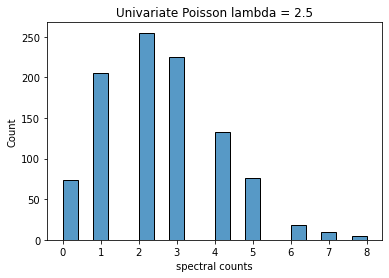

In [2]:
#Univariate Poisson
key = jax.random.PRNGKey(0)
sns.histplot(jax.random.poisson(key, lam=2.5, shape=(1000, )))
plt.title(f"Univariate Poisson lambda = {2.5}")
plt.xlabel('spectral counts')
plt.show()

In [3]:
#Independant Poisson
def bivariate_poisson(key, lam, lam2 ,samples):
    x = jax.random.poisson(key, lam, shape=(samples, ))
    key, subkey = jax.random.split(key)
    y = jax.random.poisson(subkey, lam2, shape=(samples, ))
    return x, y, key, subkey

def positive_poisson(key, lamx ,samples):
    x = jax.random.poisson(key, lam, shape=(samples, ))
    key, subkey = jax.random.split(key)
    y = jax.random.poisson(subkey, x, shape=(samples, ))
    return x, y, key, subkey

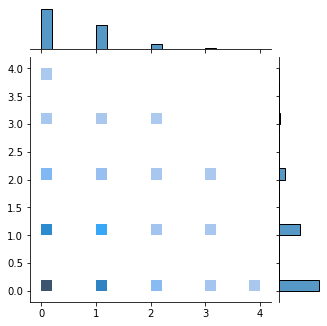

In [14]:
key = jax.random.PRNGKey(10)
lam = 0.5
samples = 1000
x, y, key, subkey = bivariate_poisson(key, lam, lam, samples)
n=4.5
def plot_bivar(n, x, y, kind='scatter'):
    sns.jointplot(x=x, y=y, kind=kind)
    fig = plt.gcf()
    fig.set_size_inches(n, n)
plot_bivar(n, x, y, 'hist')

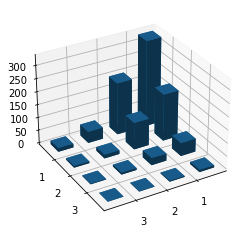

In [15]:
#%matplotlib qt
def hist3d(x, y):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    hist, xedges, yedges = np.histogram2d(x, y, bins=4, range=[[0, 4], [0, 4]])

    # Construct arrays for the anchor positions of the 16 bars.
    xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0

    # Construct arrays with the dimensions for the 16 bars.
    dx = dy = 0.5 * np.ones_like(zpos)
    dz = hist.ravel()

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
    ax.view_init(30, 60)
    plt.draw()
    plt.show()
hist3d(x, y)

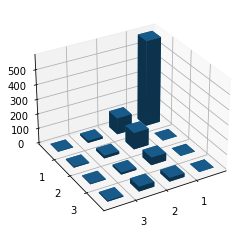

In [17]:
key, subkey = jax.random.split(key)
x, y, key, subkey = positive_poisson(key, 0.5, samples )
hist3d(x, y)
plt.show()

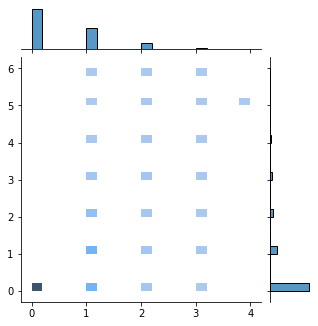

In [18]:
plot_bivar(n, x, y, 'hist')

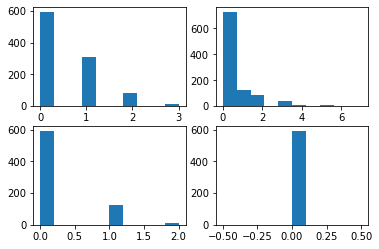

In [8]:
a = x
b = y
c = x[y==0]
d = y[x==0]
plotlist = [a, b, c, d]
for i, subplot in enumerate([a, b, c, d]):
    plt.subplot(221 + i)
    plt.hist(subplot)

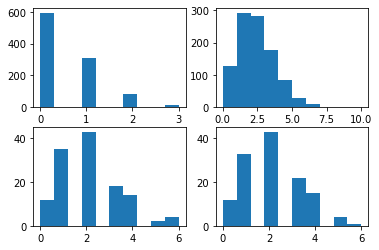

In [9]:
x = np.random.poisson(2, 1000)
y = np.random.poisson(2, 1000)

a = a
b = y
c = x[y==0]
d = y[x==0]
plotlist = [a, b, c, d]
for i, subplot in enumerate([a, b, c, d]):
    plt.subplot(221 + i)
    plt.hist(subplot)

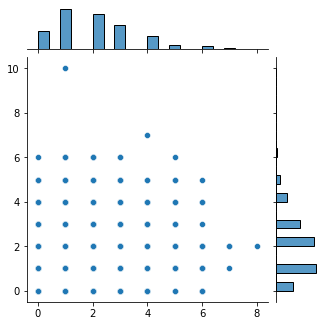

In [10]:
plot_bivar(n, x, y)